## Agenda 

&emsp;[0.0 Imports](#0.0-Imports)<br>
&emsp;&emsp;[0.1 Helper Functions](#0.1-Helper-Functions)<br>
&emsp;&emsp;[0.2 Loading Data](#0.2-Loading-Data)<br>


&emsp;[1.0 Describe Data](#1.0-Describe-Data)<br>
&emsp;&emsp;[1.1 Rename Columns](#1.1-Rename-Columns)<br>
&emsp;&emsp;[1.2 Descriptive Statistical](#1.2-Descriptive-Statistical)<br>
&emsp;&emsp;&emsp;[1.2.1. Numerical Attributes](#1.2.1.-Numerical-Attributes)<br>
&emsp;&emsp;&emsp;[1.2.2. Categorical Attributes](#1.2.2.-Categorical-Attributes)<br>



&emsp;[2.0 Feature Engineering](#2.0-Feature-Engineering)<br>
&emsp;&emsp;[2.0.1. ballance_diff](#2.0.1.-ballance_diff)<br>
&emsp;&emsp;[2.0.2. transaction_affects_balance](#2.0.2.-transaction_affects_balance)<br>
&emsp;&emsp;[2.0.3. result_in_balance_type (result_type)](#2.0.3.-result_in_balance_type-(result_type))<br>
&emsp;&emsp;[2.0.4. customer_type](#2.0.4.-customer_type)<br>


&emsp;[3.0 Exploratory Data Analysis](#3.0-Exploratory-Data-Analysis)<br>
&emsp;&emsp;[3.1 Univariate Analysis](#3.1-Univariate-Analysis)<br>
&emsp;&emsp;&emsp;[3.1.1. Response Variable](#3.1.1.-Response-Variable)<br>
&emsp;&emsp;&emsp;[3.1.2. Numerical Variables](#3.1.2.-Numerical-Variables)<br>
&emsp;&emsp;&emsp;[3.1.3. Categorical Variables](#3.1.3.-Categorical-Variables)<br>
&emsp;&emsp;&emsp;[3.1.4. Some Further Investigation](#3.1.4.-Some-Further-Investigation)<br>
&emsp;&emsp;[3.2 Multivariate Analysis](#3.2-Multivariate-Analysis)<br>
&emsp;&emsp;&emsp;[3.2.1. Numerical Attributes](#3.2.1.-Numerical-Attributes)<br>



### Data Description


**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## 0.0 Imports

In [1]:
from notebook_utils.os import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import inflection
from scipy import stats

%matplotlib inline

In [2]:
directory = Directory("1.0-pr-fraud-detection-eda")

### 0.1 Helper Functions

In [3]:
def describe_data(data):
    print(f"Shape: {data.shape}")
    try: 
        print(f"Duplicates: {data.duplicated().any()}")
    except Exception as e:
        print(f"Error when searching for duplicates:\n\t{e}")
    
    is_na = data.isna().sum()
    is_na_percentage = data.isna().sum()/data.shape[0]*100
    nan_data_frame = pd.concat([data.dtypes, is_na, is_na_percentage], axis=1)
    nan_data_frame.columns = ['data_types', 'nan_count', 'nan_percentage']
    #display(nan_data_frame)
    return nan_data_frame

# 3.1.3. Categorical Variables    
def get_categories(data):
    df = pd.DataFrame()
    for column in data.columns:
        col = pd.Series(data[column].unique(), name=column)
        df = pd.concat([df, col], axis=1).fillna('')
    return df

### 0.2 Loading Data

In [4]:
raw_data = pd.read_csv(join_paths([directory.DATA_DIR, 'raw', 'PS_20174392719_1491204439457_log.csv']))
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 1.0 Describe Data

Too many data records.<br>
I'll create a analysis pipeline with a sample.<br>
And then apply it to the full dataset.<br>

In [5]:
# data = raw_data.sample(10000)
data = raw_data.copy()

### 1.1 Rename Columns

In [6]:
# transform snakecase with inflection
snakecase = lambda x: inflection.underscore(x)
data.columns = map(snakecase, data.columns)

> **No duplicates. No NaN**

In [7]:
describe_data(data)

Shape: (6362620, 11)
Duplicates: False


,data_types,nan_count,nan_percentage
step,int64,0,0.0
type,object,0,0.0
amount,float64,0,0.0
name_orig,object,0,0.0
oldbalance_org,float64,0,0.0
newbalance_orig,float64,0,0.0
name_dest,object,0,0.0
oldbalance_dest,float64,0,0.0
newbalance_dest,float64,0,0.0
is_fraud,int64,0,0.0


### 1.2 Descriptive Statistical

In [8]:
numerical_attributes = data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.2.1. Numerical Attributes

        0.13% - Less than 1% of transaction is fraud.
                8213 frauds among 6,354,407 transactions.
        
        Evidence of heavy outliers (mean - median very different | 75% vs max skew kurtosis)

In [9]:
skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew()), columns=['skew']).T
kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis()), columns=['kurtosis']).T
stat = pd.concat([data.describe(), skew, kurtosis]).T

def style_specific_cell(x):
    df = pd.DataFrame('', index=x.index, columns=x.columns)
    
    df.iloc[-2, 0] = 'background-color: yellow'
    
    return df

stat.drop(columns='count').style.apply(style_specific_cell, axis=None).format("{:.2f}")

,mean,std,min,25%,50%,75%,max,skew,kurtosis
step,243.40,142.33,1.00,156.00,239.00,335.00,743.00,0.38,0.33
amount,179861.90,603858.23,0.00,13389.57,74871.94,208721.48,92445516.64,30.99,1797.96
oldbalance_org,833883.10,2888242.67,0.00,0.00,14208.00,107315.18,59585040.37,5.25,32.96
newbalance_orig,855113.67,2924048.50,0.00,0.00,0.00,144258.41,49585040.37,5.18,32.07
oldbalance_dest,1100701.67,3399180.11,0.00,0.00,132705.66,943036.71,356015889.35,19.92,948.67
newbalance_dest,1224996.40,3674128.94,0.00,0.00,214661.44,1111909.25,356179278.92,19.35,862.16
is_fraud,0.00,0.04,0.00,0.00,0.00,0.00,1.00,27.78,769.70
is_flagged_fraud,0.00,0.00,0.00,0.00,0.00,0.00,1.00,630.60,397659.06


In [10]:
f"{(stat.T['is_fraud']['mean']*100).round(2)}%"

'0.13%'

In [11]:
fraud_count = pd.DataFrame(data.is_fraud.value_counts())
fraud_count.index = [False, True]
fraud_count

,is_fraud
False,6354407
True,8213


#### 1.2.2. Categorical Attributes

        CASH IN has a weird distribution. Are they outliers or just normal business observations?
            oldbalanceOrg - initial balance before the transaction
            newbalanceOrig - new balance after the transaction

Does It hold most of fraudulent occurrences?<br>
[No, It doesn't.](#3.1.3.-Categorical-Variables)            

In [12]:
categorical_attributes.apply( lambda x: x.unique().shape[0] )

type               5
name_orig    6353307
name_dest    2722362
dtype: int64

In [13]:
numerical_columns = numerical_attributes.select_dtypes(include=['int64','float64']).columns

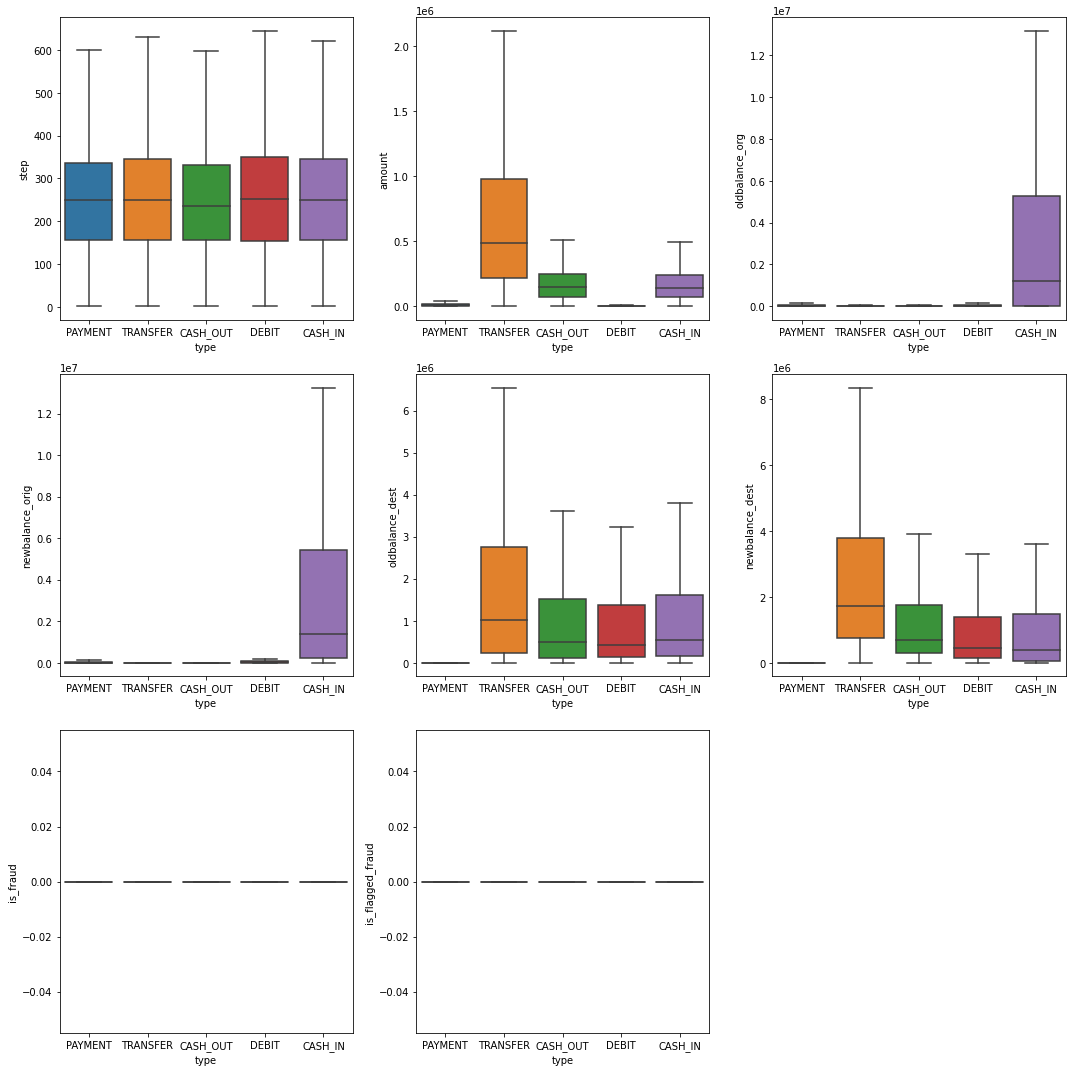

In [14]:
columns = categorical_attributes.shape[1]; rows = round(len(numerical_columns) / columns); plot = 0

plt.figure(figsize=(15,15))
for n_attribute in numerical_columns:
    plot += 1
    plt.subplot( rows, columns, plot )
    sns.boxplot( x='type', y = n_attribute, data=data, showfliers=False ) # Heavy outliers
    plt.tight_layout()

## 2.0 Feature Engineering

#### 2.0.1. ballance_diff

> **Difference in balance after the transaction**
    
        Balance Value After - Balance Value Before

In [15]:
data['balance_diff_orig'] = data['newbalance_orig'] - data['oldbalance_org']
data['balance_diff_dest'] = data['newbalance_dest'] - data['oldbalance_dest']

#### 2.0.2. transaction_affects_balance

In [16]:
data['transaction_affects_balance_orig'] = (data['balance_diff_orig'] > 0) | (data['balance_diff_orig'] < 0)
data['transaction_affects_balance_dest'] = (data['balance_diff_dest'] > 0) | (data['balance_diff_dest'] < 0)

#### 2.0.3. result_in_balance_type (result_type)

    ADDITION - Adds money in the balance
    DEDUCTION - Remove money from the balance
    NO CHANGE - Doesn't affect the balance.

In [17]:
def _map_result(value):
    if value > 0:
        return "ADDITION" 
    if value < 0:
        return "DEDUCTION"
    else:
        return "NO CHANGE"

In [18]:
data['result_type_orig'] = data['balance_diff_orig'].apply(_map_result)
data['result_type_dest'] = data['balance_diff_dest'].apply(_map_result)

#### 2.0.4. customer_type

_"Note that there is not information for customers that start with M (Merchants)."_

M = Merchants

C = Clients?

In [19]:
data['customer_orig_type'] = data['name_orig'].apply(lambda string: string[0])
data['customer_dest_type'] = data['name_dest'].apply(lambda string: string[0])

## 3.0 Exploratory Data Analysis

In [20]:
temporary_desc = describe_data(data)
temporary_desc

Shape: (6362620, 19)
Duplicates: False


,data_types,nan_count,nan_percentage
step,int64,0,0.0
type,object,0,0.0
amount,float64,0,0.0
name_orig,object,0,0.0
oldbalance_org,float64,0,0.0
newbalance_orig,float64,0,0.0
name_dest,object,0,0.0
oldbalance_dest,float64,0,0.0
newbalance_dest,float64,0,0.0
is_fraud,int64,0,0.0


In [21]:
temporary_desc['data_types'].unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')],
      dtype=object)

In [22]:
numerical_attributes = data.select_dtypes( include=['int64', 'float64'] )
categorical_attributes = data.select_dtypes( exclude=['int64', 'float64'] )

### 3.1 Univariate Analysis

#### 3.1.1. Response Variable

> Imbalance Data, We can use under or oversampling to deal with it when modeling.

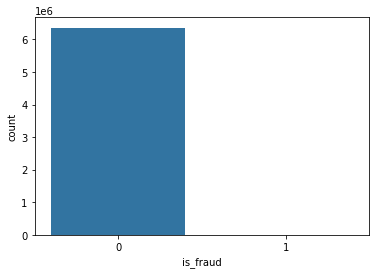

In [23]:
sns.countplot(data=data, x='is_fraud');

#### 3.1.2. Numerical Variables

In [85]:
numerical_attributes.quantile(.98).round(2)

step                      594.00
amount                1019957.81
oldbalance_org       10566324.73
newbalance_orig      10721566.55
oldbalance_dest       9174818.47
newbalance_dest       9665657.10
is_fraud                    0.00
is_flagged_fraud            0.00
balance_diff_orig      353237.85
balance_diff_dest     1147845.38
Name: 0.98, dtype: float64

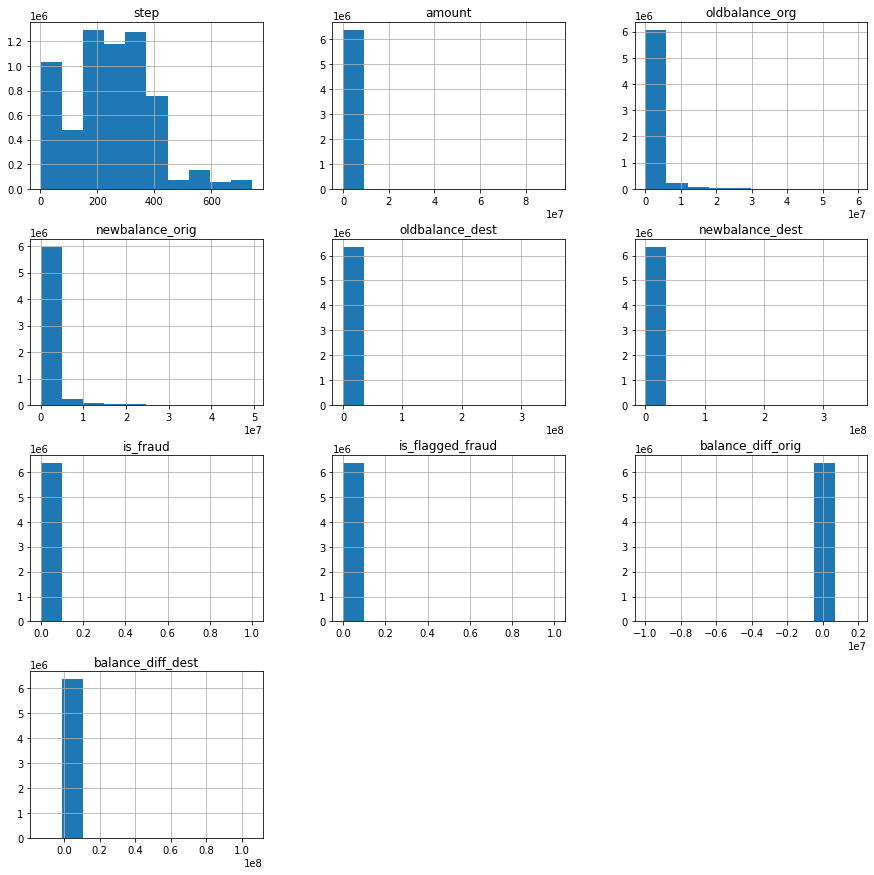

In [24]:
rows = int(np.ceil( numerical_attributes.shape[1]/3 ))
numerical_attributes.hist(figsize=(15,15), layout=(rows, 3));

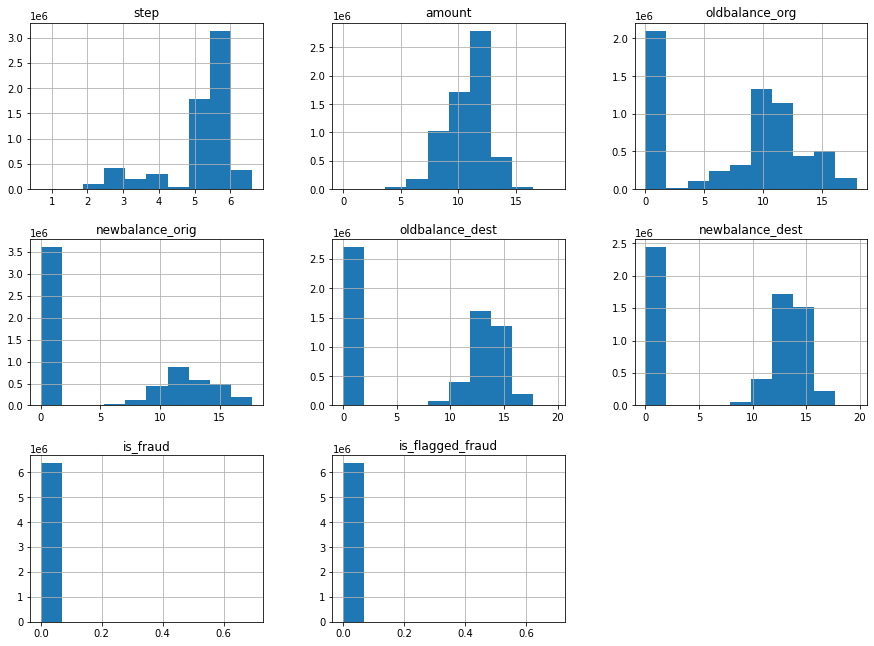

In [25]:
with_negative_values = ['balance_diff_orig', 'balance_diff_dest']
np.log1p(numerical_attributes.drop(columns=with_negative_values)).hist(figsize=(15,15), layout=(rows, 3));

#### 3.1.3. Categorical Variables
    
    type
        Fraud comes only from TRANSFER and CASH_OUT types of transaction.
        
    transaction_affects_balance_orig
        Frauds mostly happen by taking control of customers accounts and transferring the funds.
        
<font color='grey'><strong>
    This is actually told by the <a href="https://www.kaggle.com/ealaxi/paysim1" target="_blank">Kaggle host</a>:</strong> <i>In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.<i>
</font>

    transaction_affects_balance_dest
        There are frauds that doesn't seem to be transferring money to some account. The agent is 
        cashing out the fund directly.
    
    result_type_orig
        Sometimes Frauds doesn't affect the customer balance. Maybe because it was identified in time?
        Yes.
        Sometimes the agent tries to cash out but there's nothing in the balance.
        Sometimes He tries to pull a value just to high and probably is stopped.
    
    result_type_dest
        "Merchants" recipients (M) don't show us any sign of fraudulent activity.
        They are receiving PAYMENT transactions.

In [47]:
get_categories(categorical_attributes.drop(columns=['name_orig', 'name_dest']))

,type,transaction_affects_balance_orig,transaction_affects_balance_dest,result_type_orig,result_type_dest,customer_orig_type,customer_dest_type
0,PAYMENT,True,False,DEDUCTION,NO CHANGE,C,M
1,TRANSFER,False,True,NO CHANGE,DEDUCTION,,C
2,CASH_OUT,,,ADDITION,ADDITION,,
3,DEBIT,,,,,,
4,CASH_IN,,,,,,


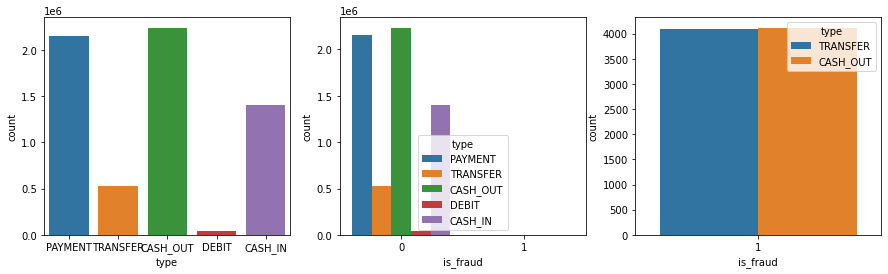

In [34]:
plt.figure(figsize=(15, 4))

# categorical attribute 1
plt.subplot( 1, 3, 1 )
sns.countplot(data=data, x='type')

plt.subplot( 1, 3, 2 )
sns.countplot(x='is_fraud', hue='type', data=data);

plt.subplot( 1, 3, 3 )
sns.countplot(x='is_fraud', hue='type', data=data[data['is_fraud'] == 1]);

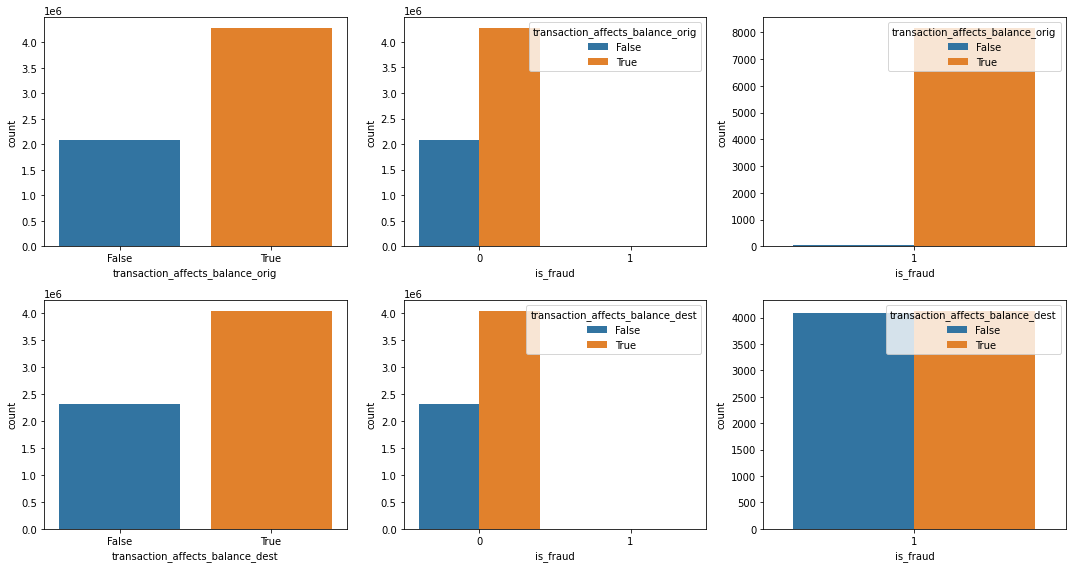

In [43]:
rows = 2; columns = 3
plt.figure(figsize=(15,8))

# categorical attribute 1
plt.subplot( rows, columns, 1 )
sns.countplot(data=data, x='transaction_affects_balance_orig')

plt.subplot( rows, columns, 2 )
sns.countplot(x='is_fraud', hue='transaction_affects_balance_orig', data=data)

plt.subplot( rows, columns, 3 )
sns.countplot(x='is_fraud', hue='transaction_affects_balance_orig', data=data[data['is_fraud'] == 1])

# categorical attribute 2
plt.subplot( rows, columns, 4 )
sns.countplot(data=data, x='transaction_affects_balance_dest')

plt.subplot( rows, columns, 5 )
sns.countplot(x='is_fraud', hue='transaction_affects_balance_dest', data=data)

plt.subplot( rows, columns, 6 )
sns.countplot(x='is_fraud', hue='transaction_affects_balance_dest', data=data[data['is_fraud'] == 1])

plt.tight_layout()

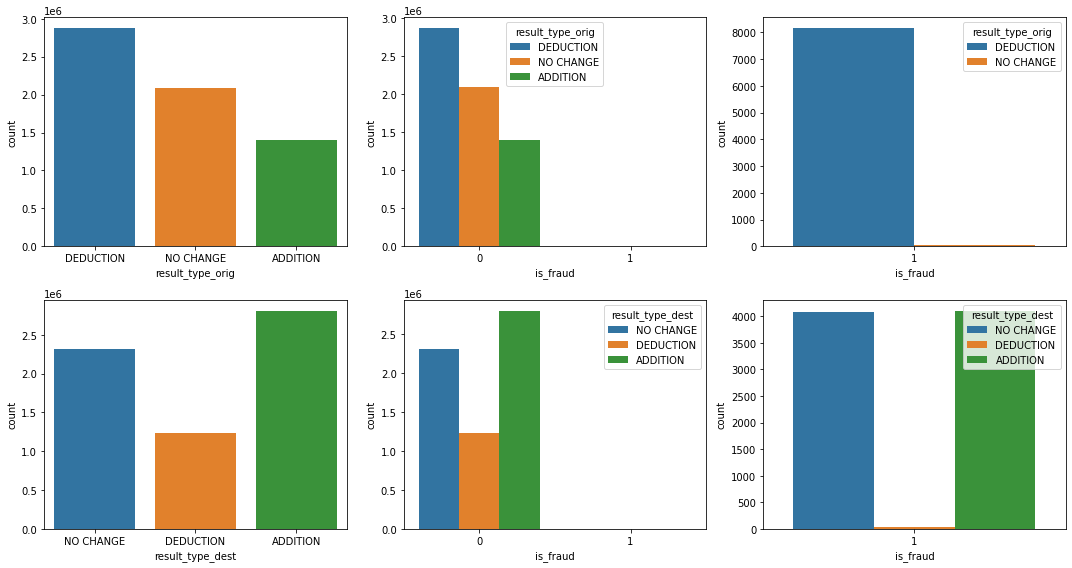

In [45]:
plt.figure(figsize=(15,8))

# categorical attribute 1
plt.subplot( rows, columns, 1 )
sns.countplot(data=data, x='result_type_orig')

plt.subplot( rows, columns, 2 )
sns.countplot(x='is_fraud', hue='result_type_orig', data=data)

plt.subplot( rows, columns, 3 )
sns.countplot(x='is_fraud', hue='result_type_orig', data=data[data['is_fraud'] == 1])

# categorical attribute 2
plt.subplot( rows, columns, 4 )
sns.countplot(data=data, x='result_type_dest')

plt.subplot( rows, columns, 5 )
sns.countplot(x='is_fraud', hue='result_type_dest', data=data)

plt.subplot( rows, columns, 6 )
sns.countplot(x='is_fraud', hue='result_type_dest', data=data[data['is_fraud'] == 1])

plt.tight_layout()

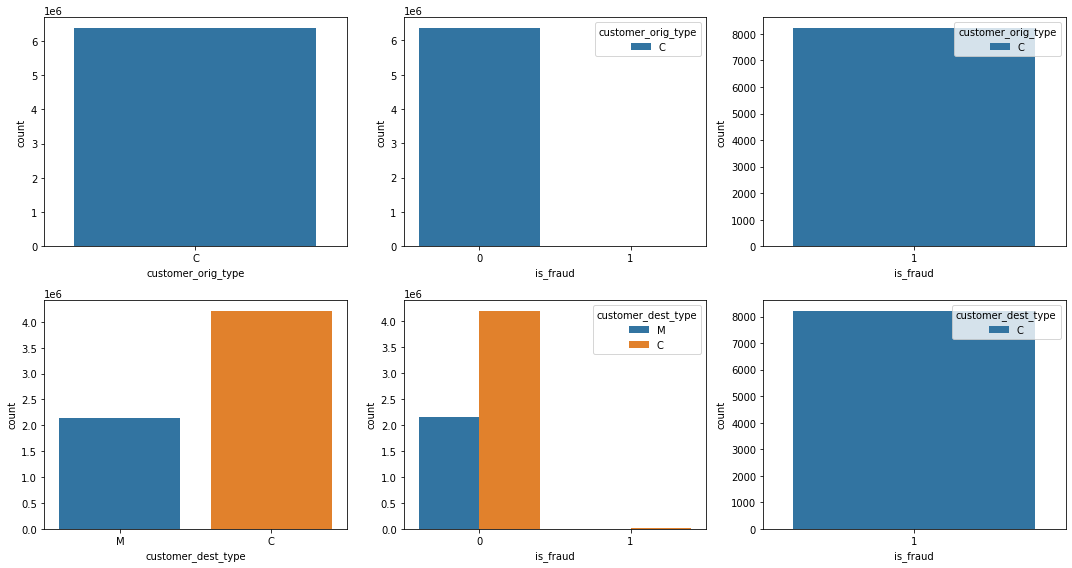

In [46]:
plt.figure(figsize=(15,8))

# categorical attribute 1
plt.subplot( rows, columns, 1 )
sns.countplot(data=data, x='customer_orig_type')

plt.subplot( rows, columns, 2 )
sns.countplot(x='is_fraud', hue='customer_orig_type', data=data)

plt.subplot( rows, columns, 3 )
sns.countplot(x='is_fraud', hue='customer_orig_type', data=data[data['is_fraud'] == 1])

# categorical attribute rows
plt.subplot( rows, columns, 4 )
sns.countplot(data=data, x='customer_dest_type')

plt.subplot( rows, columns, 5 )
sns.countplot(x='is_fraud', hue='customer_dest_type', data=data)

plt.subplot( rows, columns, 6 )
sns.countplot(x='is_fraud', hue='customer_dest_type', data=data[data['is_fraud'] == 1])

plt.tight_layout()

#### 3.1.4. Some Further Investigation

In [87]:
balance_orig_no_change = data[data['result_type_orig'] == "NO CHANGE"]

        Ex1: CASH_OUT         0.00    oldbalance_org            0.00
        Ex2: TRANSFER 7,316,255.05    oldbalance_org   17,316,255.05	
        
        Ex1: Unsuccessfull fraud attempt noticed by customer?
        Ex2: Detected Fraud by is_flagged_fraud (massive transfers)

In [89]:
balance_orig_no_change.tail()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,balance_diff_orig,balance_diff_dest,transaction_affects_balance_orig,transaction_affects_balance_dest,result_type_orig,result_type_dest,customer_orig_type,customer_dest_type
6362461,730,CASH_OUT,0.00,C729003789,0.00,0.00,C1388096959,1008609.53,1008609.53,1,0,0.0,0.0,False,False,NO CHANGE,NO CHANGE,C,C
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1,1,0.0,0.0,False,False,NO CHANGE,NO CHANGE,C,C
6362463,730,CASH_OUT,0.00,C2088151490,0.00,0.00,C1156763710,0.00,0.00,1,0,0.0,0.0,False,False,NO CHANGE,NO CHANGE,C,C
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.00,0.00,1,1,0.0,0.0,False,False,NO CHANGE,NO CHANGE,C,C
6362585,741,CASH_OUT,0.00,C312737633,0.00,0.00,C1400061387,267522.87,267522.87,1,0,0.0,0.0,False,False,NO CHANGE,NO CHANGE,C,C


        How Does someone tries to cash out money from an account with balance = 0?
        And how does this transaction affects another customer account?
        
            nameOrig - customer who started the transaction
            name_dest - customer who is the recipient of the transaction
            
A reasonable explanation should be: the data is synthetic. I'll just go with that, since it is a thing and this is also told in the [Kaggle Description](https://www.kaggle.com/ealaxi/paysim1).

_There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain [...] We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem._

In [100]:
balance_orig_no_change[(balance_orig_no_change['type'] == "CASH_OUT") & (balance_orig_no_change['oldbalance_org']==0)].head(1)\
[['type', 'amount', 'name_orig', 'oldbalance_org', 'name_dest', 'balance_diff_dest', 'is_fraud']]

,type,amount,name_orig,oldbalance_org,name_dest,balance_diff_dest,is_fraud
48,CASH_OUT,5346.89,C512549200,0.0,C248609774,5800793.91,0


        Only PAYMENT transactions.

In [103]:
merchant_dest = data[data['customer_dest_type'] == "M"]

In [105]:
merchant_dest['type'].value_counts()

PAYMENT    2151495
Name: type, dtype: int64

### 3.2 Multivariate Analysis

#### 3.2.1. Numerical Attributes

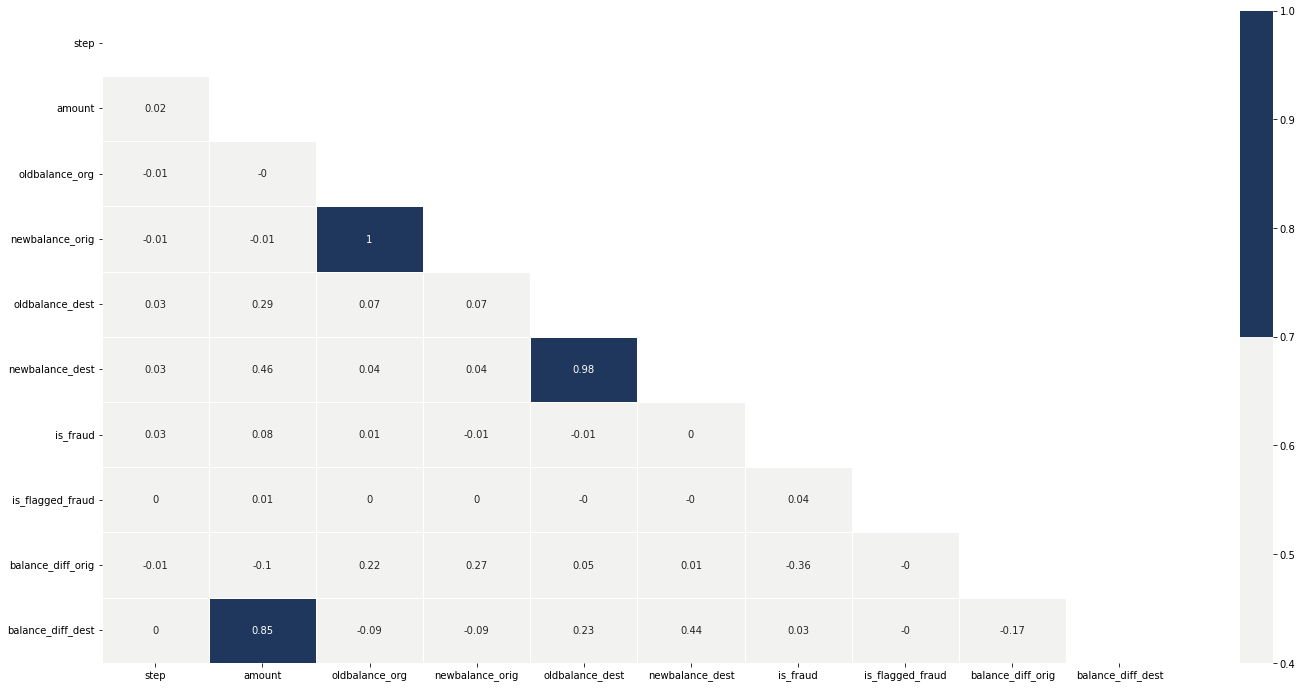

In [31]:
plt.figure(figsize=(24, 12))
correlations = numerical_attributes.corr().round(2)
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask=mask, linewidths=1, annot=True, cmap=['#F2F2F0','#1F375D'], vmin=0.40) 
plt.show()

Minimum correlation of -36%

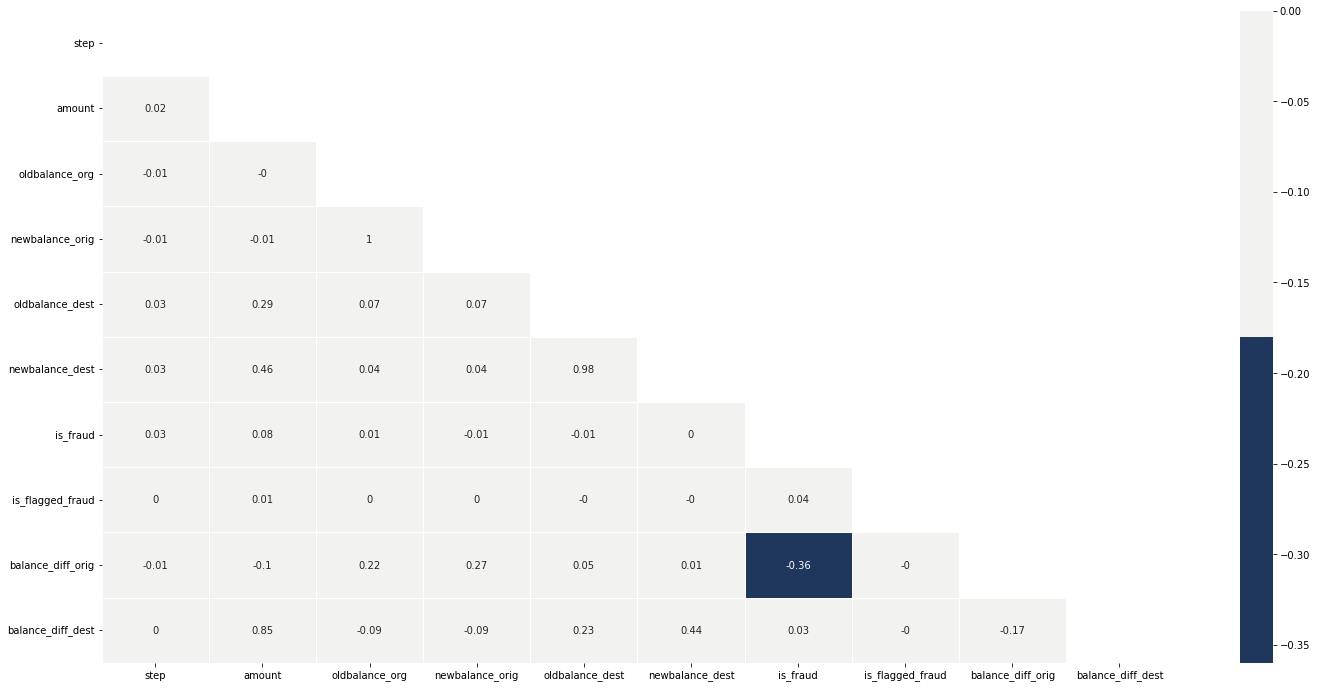

In [51]:
plt.figure(figsize=(24, 12))
correlations = numerical_attributes.corr().round(2)
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask=mask, linewidths=1, annot=True, cmap=['#1F375D','#F2F2F0'], vmax=0.0) 
plt.show()